# 글로벌 신뢰도 조사

* column

    * Neighbourhood 이웃에 대한 신뢰        
    * Government 정부에 대한 신뢰          
    * Scientist  과학에 대한 신뢰      
    * Journalist 언론에 대한 신뢰          
    * Doctor and Nurses 의료진에 대한 신뢰  
    * Philantropist 자선단체에 대한 신뢰  
    * Traditional Healer 전통 치료사에 대한 신뢰
    
* 응답

   * 1 많이
   * 2 어느정도
   * 3 많지 않다
   * 4 전혀 없음 
   * 99 : 응답거부 or Null 값
   
   
* 사용 파일
    * global_trust-rate 1이나 2로 응답한 사람들의 비율 % (Null 값 없음)
    * global_trust-details 전체 응답자 데이터 (Null 값은 99로 대체)
   
    
    

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-trust-rate/global_trust-rate.csv
/kaggle/input/global-trust-rate/rate_calculate.py
/kaggle/input/global-trust-rate/global_trust-survey.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df =pd.read_csv('/kaggle/input/global-trust-rate/global_trust-rate.csv')
df

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
0,Albania,50.72,43.57,49.19,53.49,69.03,54.68,42.43
1,Algeria,67.30,64.98,84.42,44.31,81.13,68.35,74.09
2,Argentina,75.87,43.52,89.37,52.81,92.46,71.40,13.94
3,Australia,92.21,74.49,93.85,71.31,98.09,87.26,57.33
4,Austria,88.44,73.87,95.68,75.35,96.99,82.12,61.15
...,...,...,...,...,...,...,...,...
108,Uzbekistan,90.51,97.45,93.34,90.36,93.48,83.08,45.52
109,Venezuela,61.17,29.60,66.70,53.85,77.46,59.52,27.05
110,Vietnam,77.74,NaN,76.91,60.07,88.43,79.31,79.53
111,Zambia,45.30,47.73,51.23,59.81,72.71,62.07,14.17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
count,113.000000,107.000000,113.000000,112.000000,113.000000,113.000000,113.000000
mean,73.631858,56.933178,79.630265,59.563750,84.656726,69.596726,44.980354
std,15.491183,19.576820,15.238822,14.571525,11.954537,13.473598,19.930467
min,22.990000,17.750000,38.970000,12.450000,45.990000,29.040000,8.540000
25%,65.150000,43.545000,68.420000,49.765000,78.890000,61.010000,30.340000
50%,76.030000,55.190000,84.420000,60.430000,87.080000,70.510000,44.470000
75%,86.370000,72.345000,91.780000,68.087500,94.310000,79.690000,59.280000
max,96.130000,97.450000,98.170000,90.830000,99.400000,94.020000,92.470000


In [6]:
df.nunique()

Country                113
Neighbourhood          113
Government             106
Scientist              111
Journalist             112
Doctor and Nurses      110
Philantropist          113
Traditional Healers    112
dtype: int64

In [7]:
df.isnull().sum()

Country                0
Neighbourhood          0
Government             6
Scientist              0
Journalist             1
Doctor and Nurses      0
Philantropist          0
Traditional Healers    0
dtype: int64

In [8]:
df[df['Government'].isna()]

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
5,Bahrain,64.29,NaN,71.10,51.47,82.39,70.51,60.27
18,China,88.08,NaN,96.57,74.62,90.86,73.24,92.47
85,Saudi Arabia,72.47,NaN,78.66,NaN,78.43,66.81,53.28
97,Tajikistan,70.90,NaN,84.78,57.68,79.29,47.22,59.08
104,United Arab Emirates,70.97,NaN,81.19,68.00,86.71,84.74,64.93
110,Vietnam,77.74,NaN,76.91,60.07,88.43,79.31,79.53


정부에 대한 신뢰도가 nan 값인 나라들은 국민에 대한 강한 감시나 압제가 있는 나라임을 알 수 있다.

## 결측치 제거

In [9]:
df1 = df.fillna(0)

In [10]:
df1.isna().sum()

Country                0
Neighbourhood          0
Government             0
Scientist              0
Journalist             0
Doctor and Nurses      0
Philantropist          0
Traditional Healers    0
dtype: int64

<AxesSubplot:>

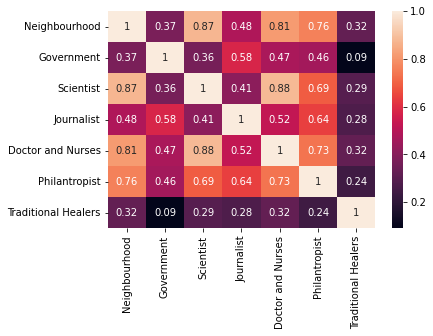

In [11]:
sns.heatmap(df1.corr(),annot=True)

In [12]:
df_countries_gov =df1[['Country','Government']].sort_values('Government',ascending=False)

In [13]:
df_countries_gov

,Country,Government
108,Uzbekistan,97.45
77,Norway,96.27
56,Laos,94.93
69,Myanmar,94.40
95,Switzerland,93.89
...,...,...
97,Tajikistan,0.00
5,Bahrain,0.00
85,Saudi Arabia,0.00
110,Vietnam,0.00


## country & Government

In [91]:
df_gov_top10 = df_countries_gov.head(10)
df_gov_down10 = df_countries_gov.tail(10)

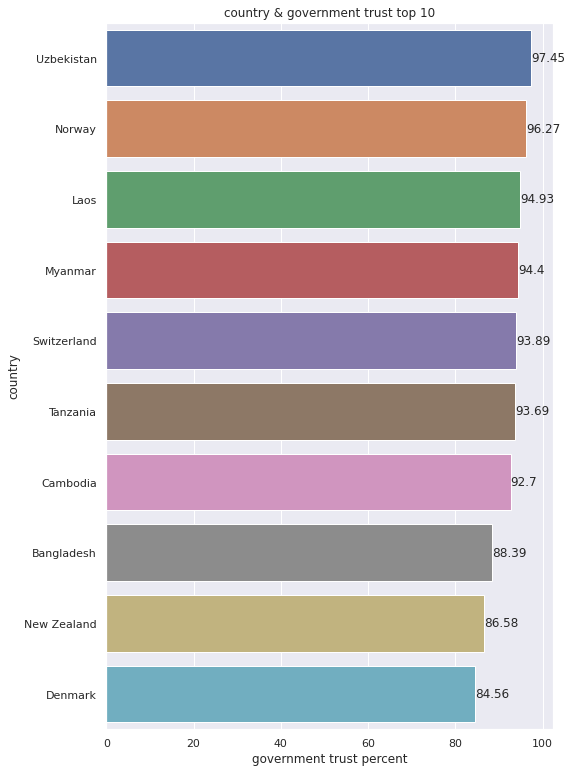

In [93]:
plt.figure(figsize=(8,13))

ax = sns.barplot(data=df_gov_top10,
            x='Government',
            y='Country')

plt.title('country & government trust top 10')
plt.xlabel('government trust percent')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()
        
            

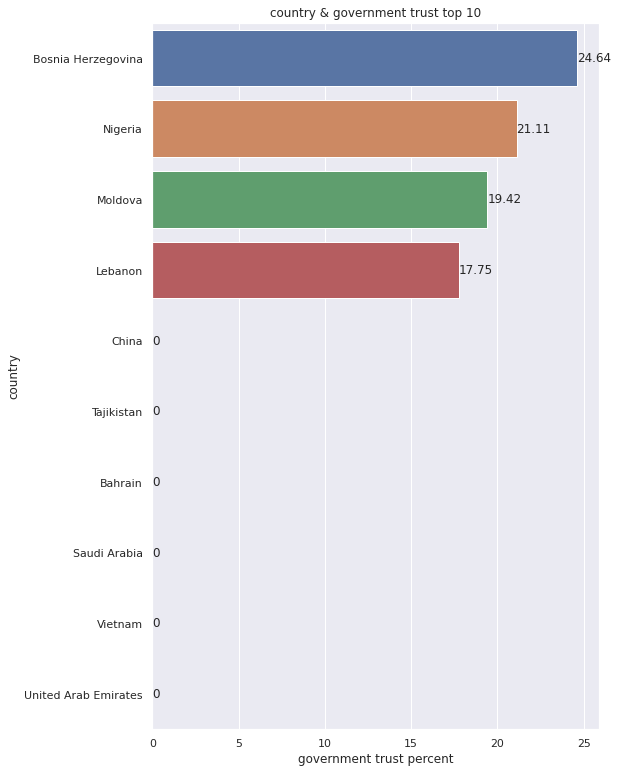

In [94]:
plt.figure(figsize=(8,13))

ax = sns.barplot(data=df_gov_down10,
            x='Government',
            y='Country')

plt.title('country & government trust top 10')
plt.xlabel('government trust percent')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

# 나라의 경제력이 정부에 대한 신뢰도의 지표가 되지 않는다. (전쟁,테러 등이 자주 일어나는 곳은 정부에 대한 신뢰가 낮다?)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


## Country & Neighbourhood


In [17]:
df_countries_nei = df1[['Country','Neighbourhood']].sort_values('Neighbourhood',ascending=False)
df_countries_nei

,Country,Neighbourhood
77,Norway,96.13
94,Sweden,95.29
25,Denmark,95.20
73,New Zealand,93.92
72,Netherlands,93.70
...,...,...
20,Congo Brazzaville,39.63
15,Cameroon,33.71
49,Ivory Coast,31.17
34,Gabon,28.19


In [18]:
df_nei_top10 = df_countries_nei.head(10)
df_nei_down10 = df_countries_nei.tail(10)

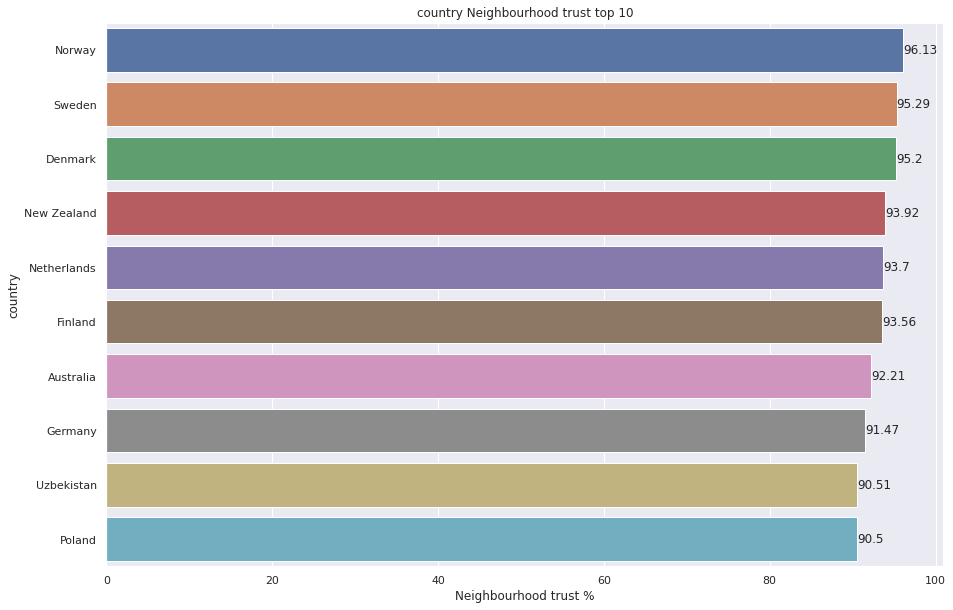

In [96]:
plt.figure(figsize=(15,10))

ax =sns.barplot(data=df_nei_top10,
           x = 'Neighbourhood',
           y = 'Country' 
           
           )

plt.title('country Neighbourhood trust top 10')
plt.xlabel('Neighbourhood trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

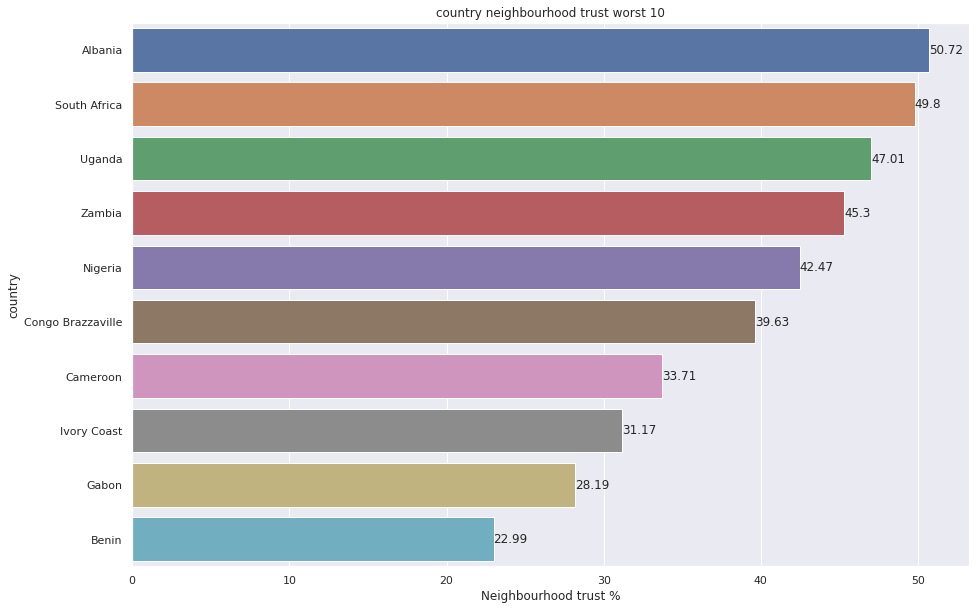

In [97]:
plt.figure(figsize=(15,10))
ax =sns.barplot(data=df_nei_down10,
           x = 'Neighbourhood',
           y = 'Country' 
           )
ax.bar_label(ax.containers[0])
plt.title('country neighbourhood trust worst 10')
plt.xlabel('Neighbourhood trust %')
plt.ylabel('country')
plt.show()


# 유럽쪽은 이웃에 대한 신뢰도가 높다. / 아프리카쪽은 이웃에 대한 신뢰도가 낮다.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


## country & scientist


In [22]:
df_country_sci = df1[['Country','Scientist']].sort_values('Scientist',ascending=False)
df_country_sci

,Country,Scientist
77,Norway,98.17
7,Belgium,98.09
25,Denmark,97.87
24,Czech Republic,97.10
32,Finland,96.92
...,...,...
75,Nigeria,47.41
20,Congo Brazzaville,45.62
8,Benin,43.36
34,Gabon,41.52


In [23]:
df_sci_top10 = df_country_sci.head(10)
df_sci_down10 = df_country_sci.tail(10)

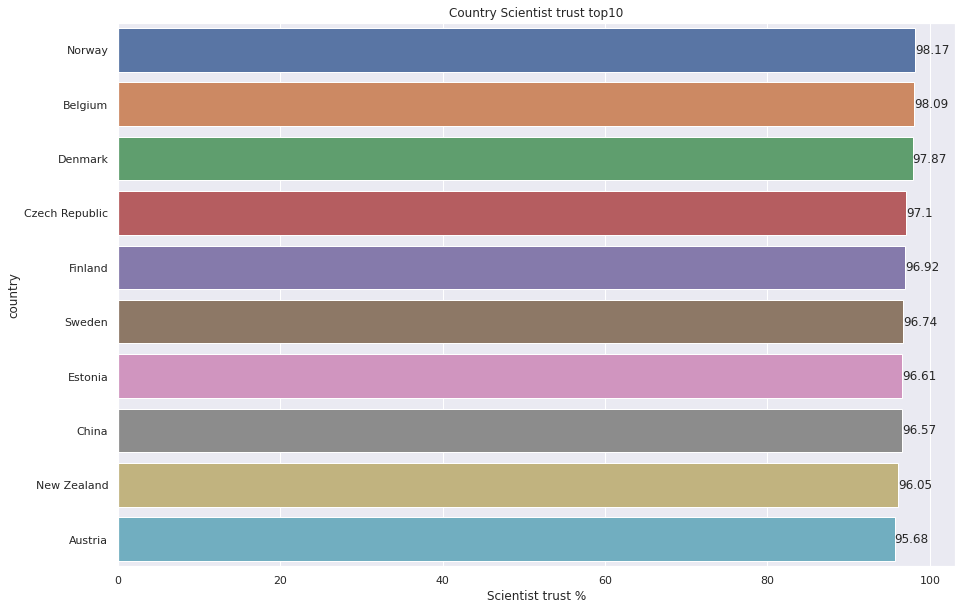

In [98]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_sci_top10,
           x = 'Scientist',
           y = 'Country'
           )
plt.title('Country Scientist trust top10')
plt.xlabel('Scientist trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()


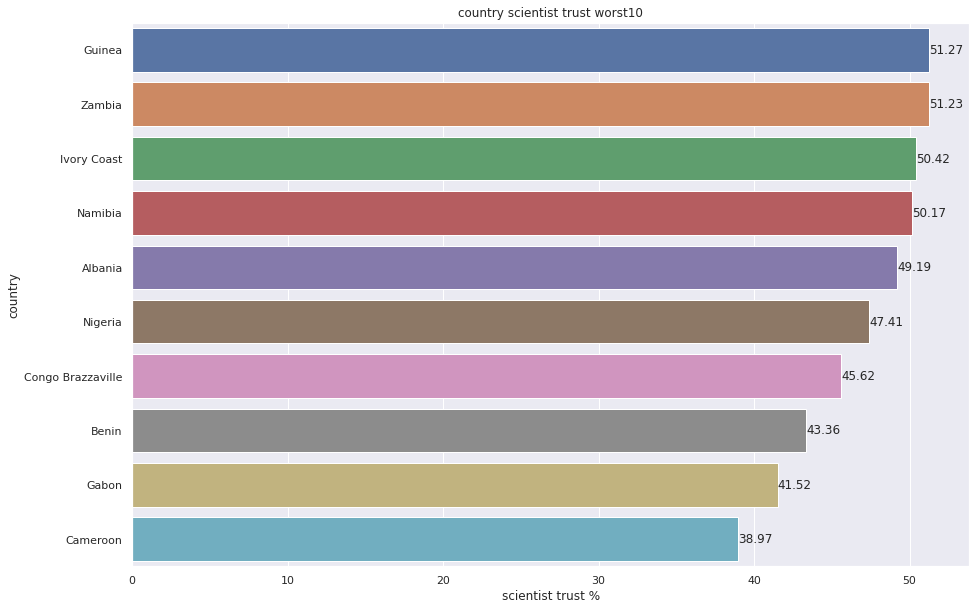

In [99]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_sci_down10,
           x = 'Scientist',
           y = 'Country'
           )
plt.title('country scientist trust worst10')
plt.xlabel('scientist trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

# 유럽 과학자에 대한 신뢰도가 높다 / 아프리카 과학자에 대한 신뢰도가 낮다 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


## country & Journalist 

In [27]:
df_country_jour = df[['Country','Journalist']].sort_values('Journalist',ascending=False)
df_country_jour.head()

,Country,Journalist
98,Tanzania,90.83
108,Uzbekistan,90.36
56,Laos,89.40
77,Norway,87.92
95,Switzerland,83.17


In [28]:
df_jour_top10 = df_country_jour.head(10)
df_jour_down10 = df_country_jour.tail(10)

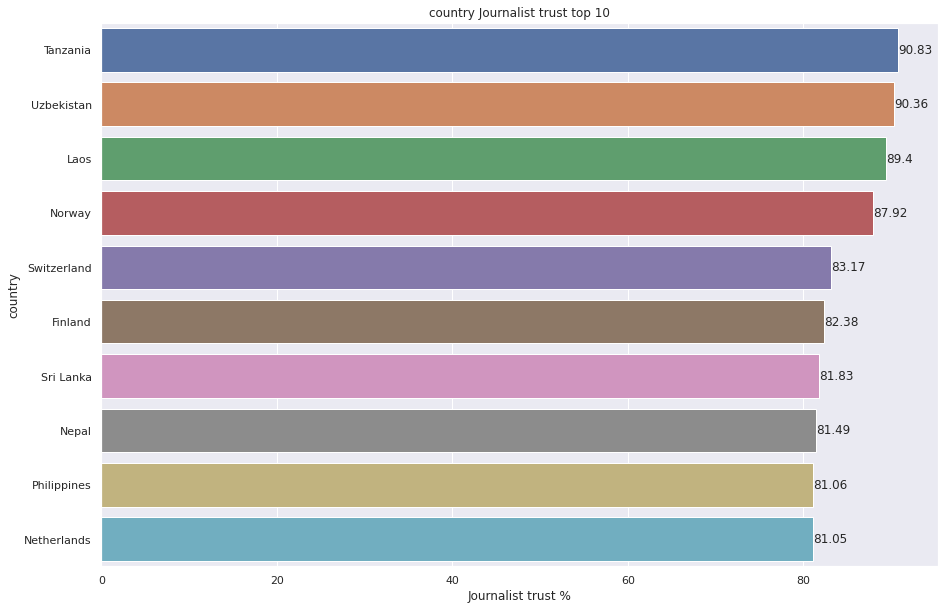

In [100]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_jour_top10,
                x = 'Journalist',
                y = 'Country'
                )
plt.title('country Journalist trust top 10')
plt.xlabel('Journalist trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

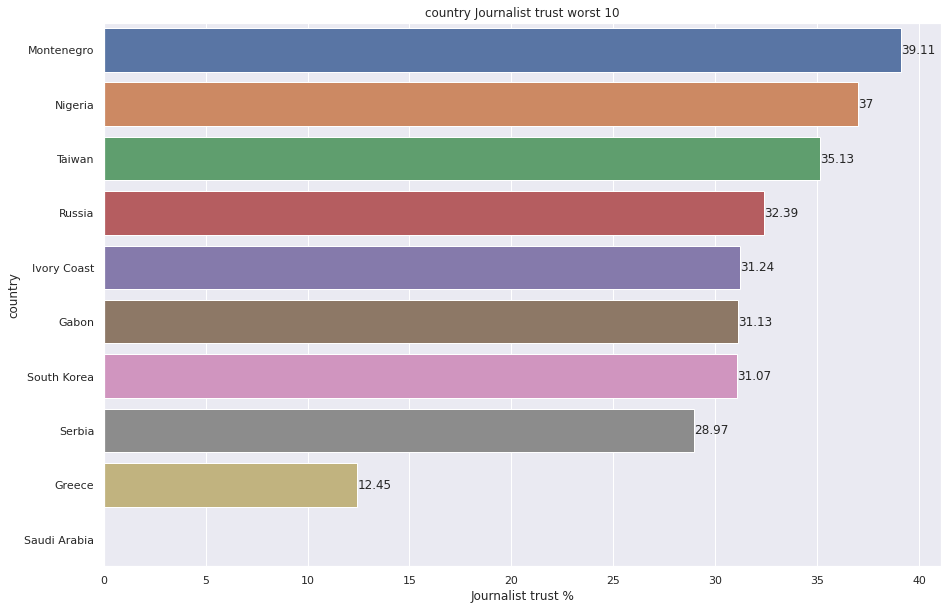

In [101]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_jour_down10,
                x = 'Journalist',
                y = 'Country' 
                )
plt.title('country Journalist trust worst 10')
plt.xlabel('Journalist trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

# 그리스는 기자에 대한 신뢰도가 압도적으로 낮다. 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


## country & Doctor and Nurses  

In [32]:
df_country_doc = df1[['Country','Doctor and Nurses']].sort_values('Doctor and Nurses',ascending=False)
df_country_doc

,Country,Doctor and Nurses
77,Norway,99.40
32,Finland,98.80
7,Belgium,98.70
3,Australia,98.09
25,Denmark,98.00
...,...,...
39,Guinea,56.42
49,Ivory Coast,54.34
34,Gabon,53.78
20,Congo Brazzaville,53.54


In [33]:
df_doc_top10 = df_country_doc.head(10)
df_doc_down10 = df_country_doc.tail(10)

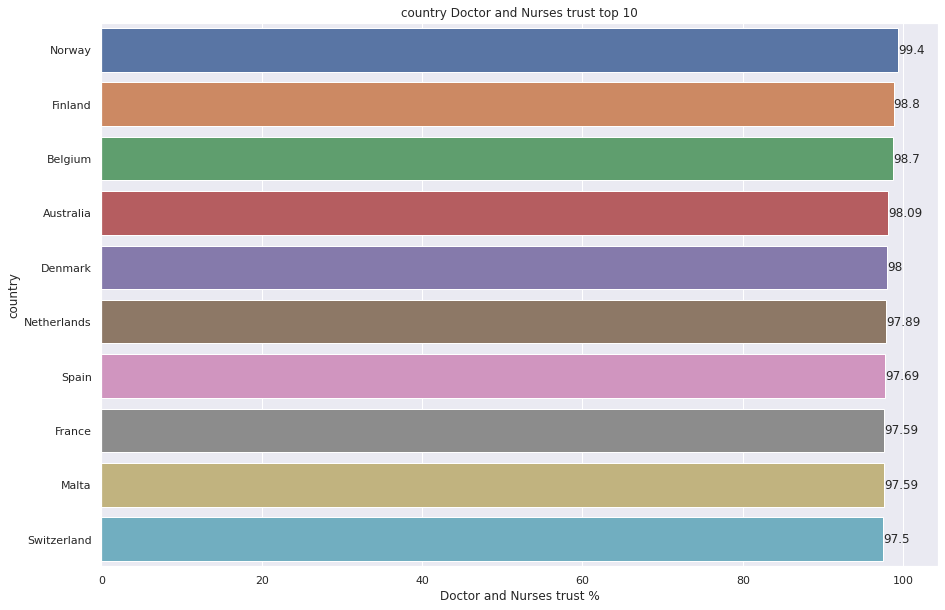

In [102]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data = df_doc_top10,
                x = 'Doctor and Nurses',
                y = 'Country' 
                )
plt.title('country Doctor and Nurses trust top 10')
plt.xlabel('Doctor and Nurses trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

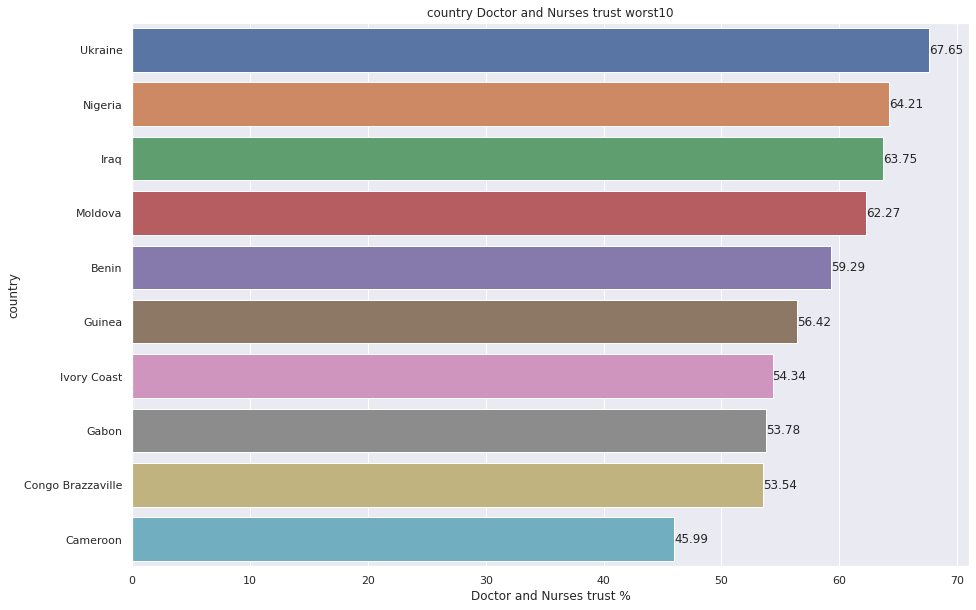

In [103]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data = df_doc_down10,
                x = 'Doctor and Nurses',
                y = 'Country' 
                )
plt.title('country Doctor and Nurses trust worst10')
plt.xlabel('Doctor and Nurses trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

## country Philantropist

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


In [37]:
df_country_phil = df1[['Country','Philantropist']].sort_values('Philantropist',ascending=False)
df_country_phil.head()

,Country,Philantropist
73,New Zealand,94.02
77,Norway,91.86
36,Germany,89.66
14,Cambodia,89.04
25,Denmark,88.74


In [38]:
df_phil_top10 = df_country_phil.head(10)
df_phil_down10 = df_country_phil.tail(10)

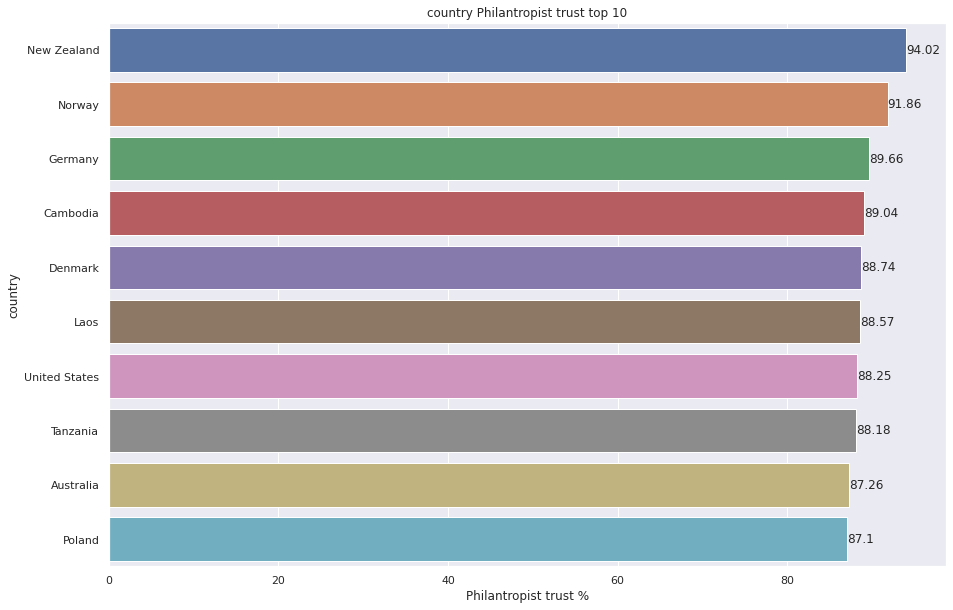

In [104]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data = df_phil_top10,
                x = 'Philantropist',
                y = 'Country'
                )
plt.title('country Philantropist trust top 10')
plt.xlabel('Philantropist trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

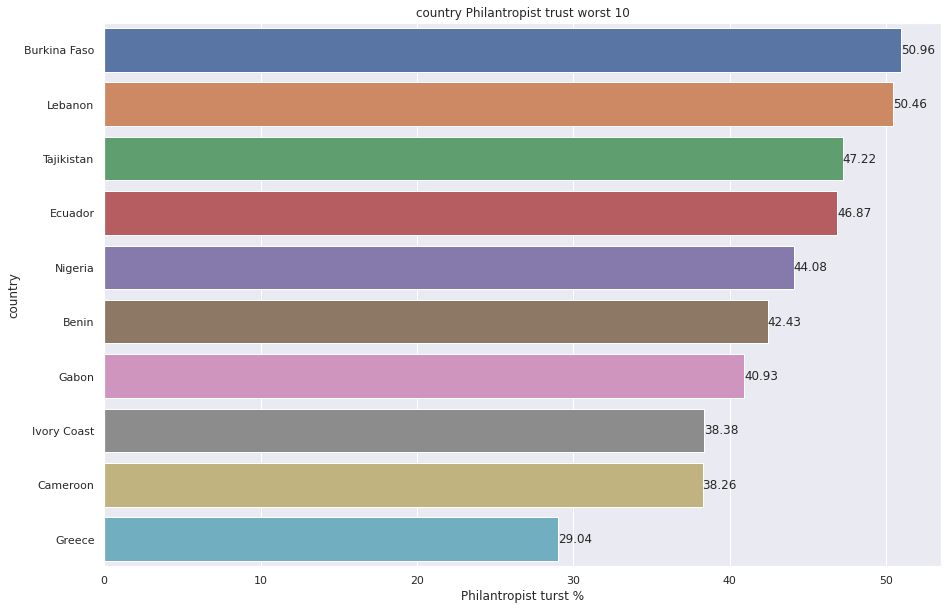

In [105]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_phil_down10,
                x= 'Philantropist',
                y = 'Country')
plt.title('country Philantropist trust worst 10')
plt.xlabel('Philantropist turst %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()



# 자선사업의 기원은 그리스 인데 왜 부정적일까?(자선사업[Philantropist]이란 말은 고대 그리스 철학자 아리스토텔레스가 처음으로 사용했다고 한다.)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              113 non-null    object 
 1   Neighbourhood        113 non-null    float64
 2   Government           107 non-null    float64
 3   Scientist            113 non-null    float64
 4   Journalist           112 non-null    float64
 5   Doctor and Nurses    113 non-null    float64
 6   Philantropist        113 non-null    float64
 7   Traditional Healers  113 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.2+ KB


# country & Traditional Healers

In [42]:
df_country_trad = df1[['Country','Traditional Healers']].sort_values('Traditional Healers',ascending=False)
df_country_trad.head()

,Country,Traditional Healers
18,China,92.47
93,Sri Lanka,91.54
56,Laos,85.17
66,Mongolia,81.36
62,Malta,80.79


In [43]:
df_trad_top10 = df_country_trad.head(10)
df_trad_down10 = df_country_trad.tail(10)

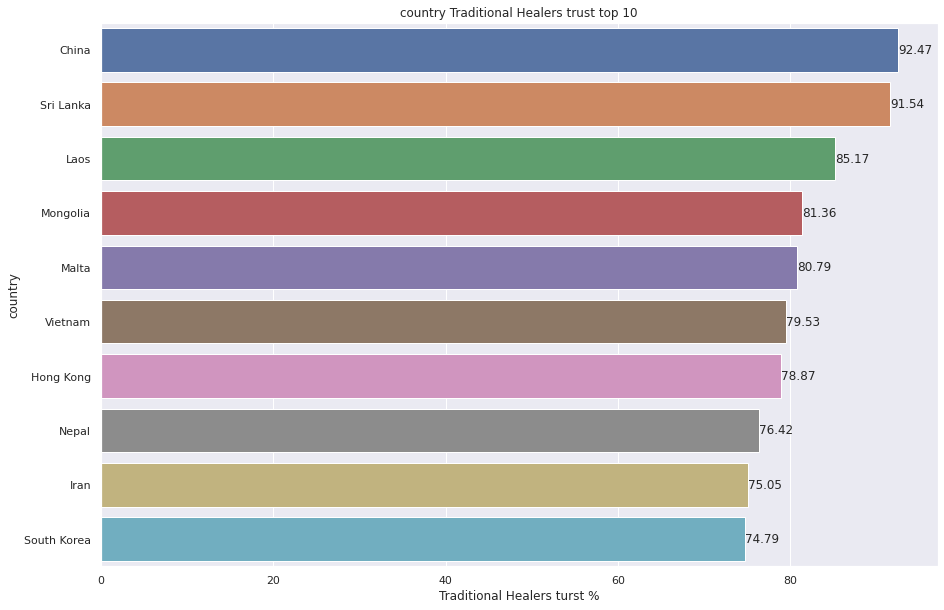

In [106]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_trad_top10,
                x='Traditional Healers',
                y= 'Country')
plt.title("country Traditional Healers trust top 10")
plt.xlabel('Traditional Healers turst %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

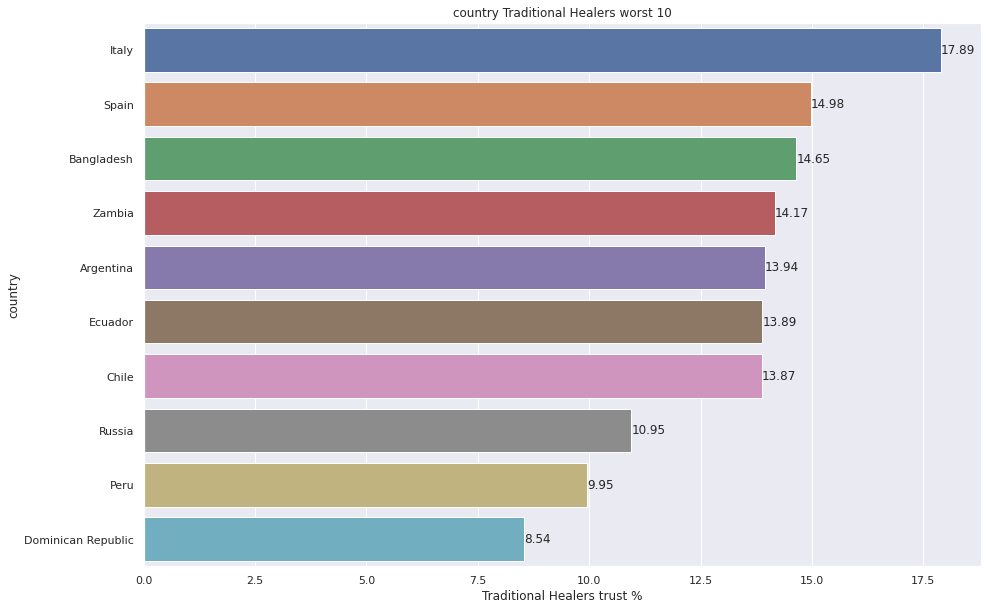

In [107]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_trad_down10,
                x='Traditional Healers',
                y='Country')
plt.title('country Traditional Healers worst 10')
plt.xlabel('Traditional Healers trust %')
plt.ylabel('country')
ax.bar_label(ax.containers[0])
plt.show()

# 중국 한국을 비롯한 아시아 계열이 전통의학(침술? 한의학?)에 신뢰도가 높다.

## global Indicators

In [46]:
df_pi = df1.melt(
    id_vars ='Country',
    value_vars=['Neighbourhood',
                'Government',
                'Scientist',
                'Journalist',
                'Doctor and Nurses',
                'Philantropist',
                'Traditional Healers'],
                var_name = 'Columns',
                value_name = '%_percent').sort_values(['Country','Columns'], ascending=True)

In [47]:
df_pi

,Country,Columns,%_percent
452,Albania,Doctor and Nurses,69.03
113,Albania,Government,43.57
339,Albania,Journalist,53.49
0,Albania,Neighbourhood,50.72
565,Albania,Philantropist,54.68
...,...,...,...
451,Zimbabwe,Journalist,65.99
112,Zimbabwe,Neighbourhood,64.96
677,Zimbabwe,Philantropist,83.90
338,Zimbabwe,Scientist,73.22


In [48]:
df_mean = df_pi.groupby('Columns')[['%_percent']].mean().reset_index()
df_mean

,Columns,%_percent
0,Doctor and Nurses,84.656726
1,Government,53.910177
2,Journalist,59.036637
3,Neighbourhood,73.631858
4,Philantropist,69.596726
5,Scientist,79.630265
6,Traditional Healers,44.980354


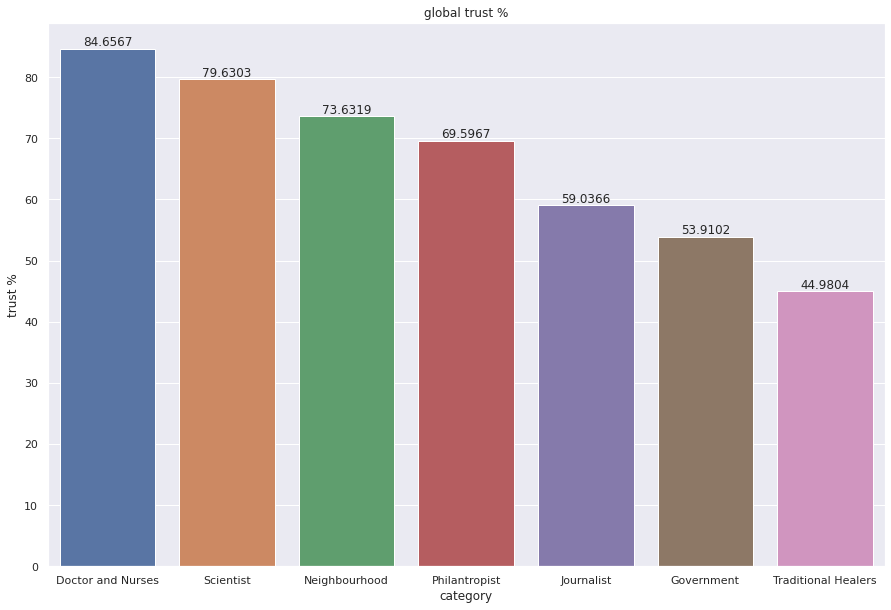

In [108]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_mean.sort_values('%_percent', ascending=False),
            x ='Columns',
            y = '%_percent')

plt.title('global trust %')
plt.xlabel('category')
plt.ylabel('trust %')
ax.bar_label(ax.containers[0])
plt.show()

# 전세계적으로 봤을 때 의료진 과학자 이웃에 대한 신뢰도가 높고 전통의학 정부 기자 순으로 신뢰도가 낮다.

## korea Indicators

In [84]:
df_kor = df_pi[df_pi['Country'] == 'South Korea']
df_kor

,Country,Columns,%_percent
543,South Korea,Doctor and Nurses,94.59
204,South Korea,Government,51.89
430,South Korea,Journalist,31.07
91,South Korea,Neighbourhood,84.13
656,South Korea,Philantropist,61.07
317,South Korea,Scientist,91.24
769,South Korea,Traditional Healers,74.79


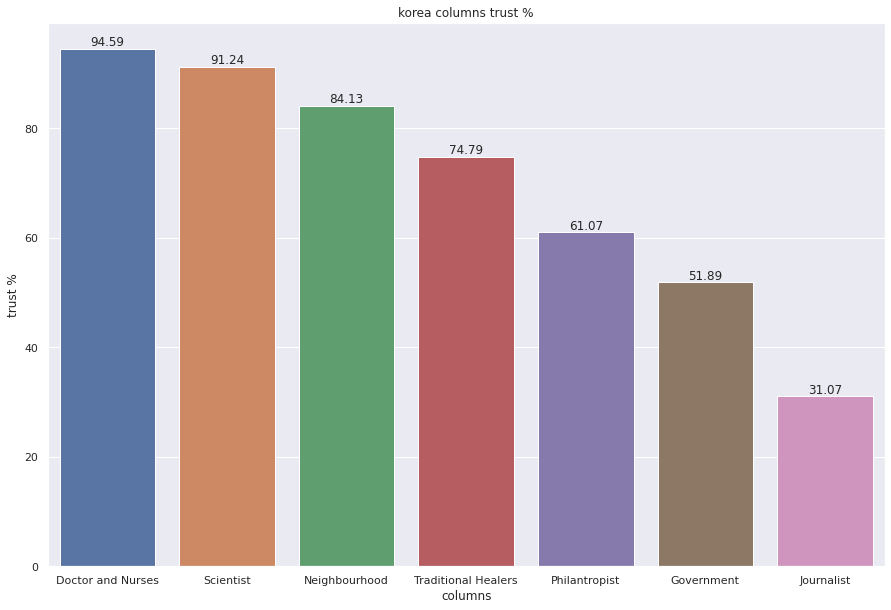

In [109]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_kor.sort_values('%_percent', ascending=False),
            x = 'Columns',
            y = '%_percent')

plt.title('korea columns trust %')
plt.xlabel('columns')
plt.ylabel('trust %')
ax.bar_label(ax.containers[0])
plt.show()

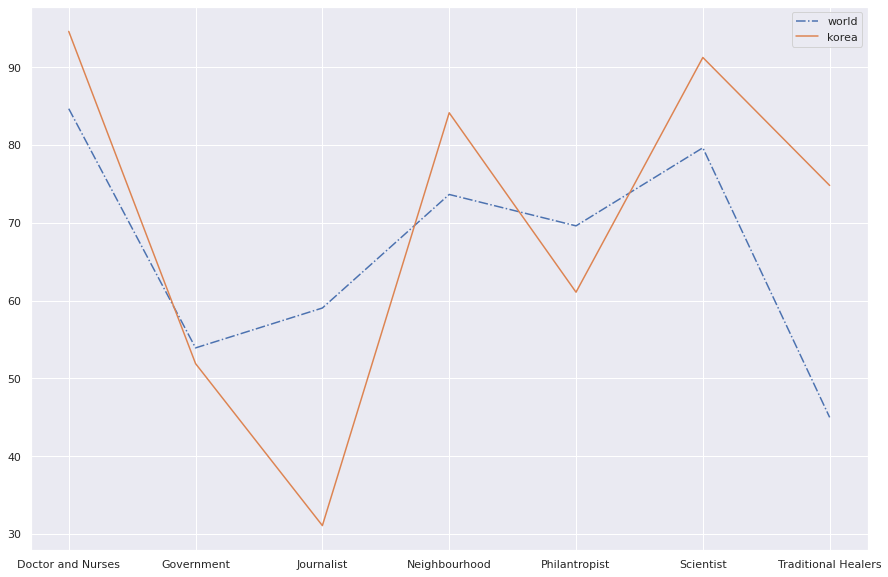

In [110]:
plt.figure(figsize=(15,10))
plt.plot(df_mean['Columns'], df_mean['%_percent'], ms=5, mec='k', markerfacecolor = 'o', ls='-.', label ='world')
plt.plot(df_kor['Columns'], df_kor['%_percent'], ms=5, label='korea')
plt.legend()
plt.show()

<AxesSubplot:ylabel='%_percent'>

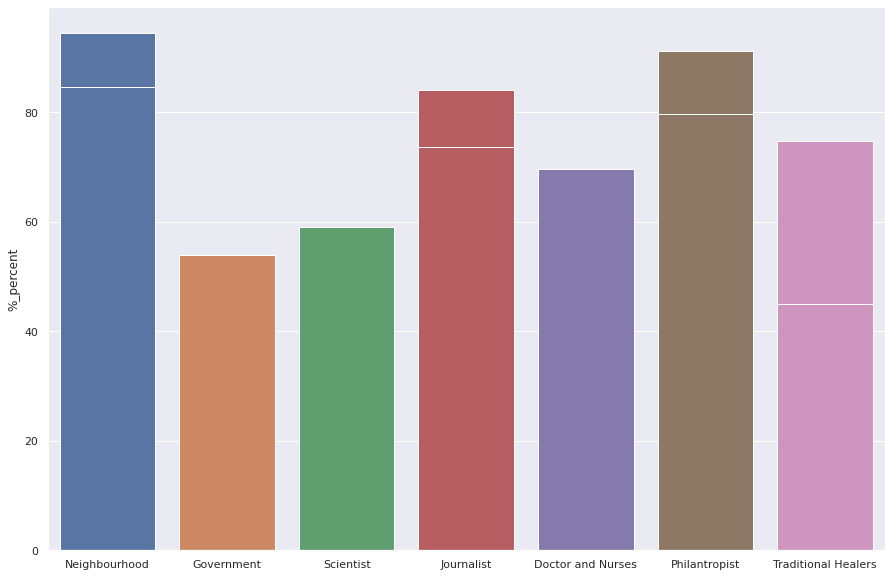

In [111]:
plt.figure(figsize=(15,10))
sns.set_theme()
sns.barplot(data = df_kor, x=['Neighbourhood',
                'Government',
                'Scientist',
                'Journalist',
                'Doctor and Nurses',
                'Philantropist',
                'Traditional Healers'],
           y='%_percent')
sns.barplot(data = df_mean, x=['Neighbourhood',
                'Government',
                'Scientist',
                'Journalist',
                'Doctor and Nurses',
                'Philantropist',
                'Traditional Healers'],
           y='%_percent')



# 한국은 의료진 과학자 이웃 순으로 신뢰도가 높으며, 기자 정부 자선사업가 순으로 신뢰도가 낮다.

## etc asia (china japan south korea) 아시아 3국

In [50]:
df1['Country'].unique() #China Japan South Korea

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia',
       'Congo Brazzaville', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guinea',
       'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lebanon', 'Lithuania', 'Malaysia', 'Mali', 'Malta', 'Mauritius',
       'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Nigeria', 'North Mac

In [76]:
df3 = df1[df1['Country'] == 'China'] 
df4 = df1[df1['Country'] == 'Japan'] 
df5 = df1[df1['Country'] == 'South Korea']

In [77]:
df6 = pd.concat([df3,df4,df5])


In [78]:
df6

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
18,China,88.08,0.00,96.57,74.62,90.86,73.24,92.47
50,Japan,86.37,60.94,93.92,56.31,97.19,77.06,58.26
91,South Korea,84.13,51.89,91.24,31.07,94.59,61.07,74.79


In [79]:
df_asia = df6.melt(
        id_vars = 'Country',
        value_vars=['Neighbourhood',
                'Government',
                'Scientist',
                'Journalist',
                'Doctor and Nurses',
                'Philantropist',
                'Traditional Healers'],
    var_name = 'Columns',
    value_name = '%_percent').sort_values(['Country','Columns'],ascending=True)


In [80]:
df_asia

,Country,Columns,%_percent
12,China,Doctor and Nurses,90.86
3,China,Government,0.00
9,China,Journalist,74.62
0,China,Neighbourhood,88.08
15,China,Philantropist,73.24
6,China,Scientist,96.57
18,China,Traditional Healers,92.47
13,Japan,Doctor and Nurses,97.19
4,Japan,Government,60.94
10,Japan,Journalist,56.31


In [81]:
df_mean_asia = df_asia.groupby('Columns')[['%_percent']].mean().reset_index()
df_mean_asia

,Columns,%_percent
0,Doctor and Nurses,94.213333
1,Government,37.610000
2,Journalist,54.000000
3,Neighbourhood,86.193333
4,Philantropist,70.456667
5,Scientist,93.910000
6,Traditional Healers,75.173333


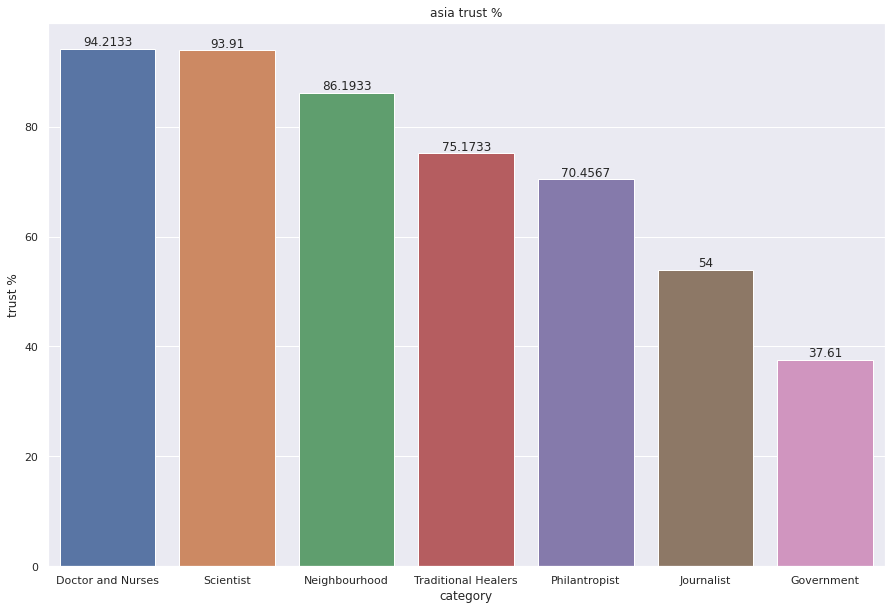

In [112]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_mean_asia.sort_values('%_percent', ascending=False),
            x ='Columns',
            y = '%_percent')

plt.title('asia trust %')
plt.xlabel('category')
plt.ylabel('trust %')
ax.bar_label(ax.containers[0])
plt.show()


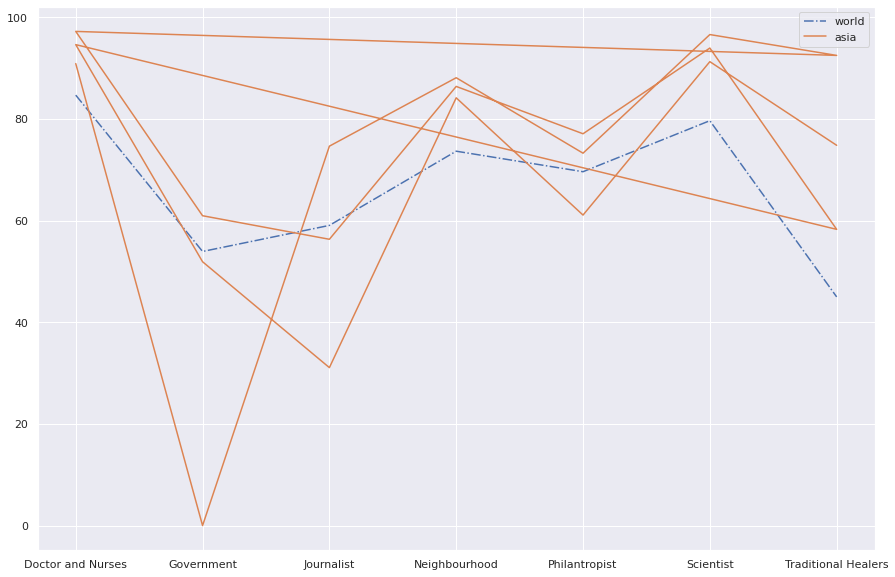

In [113]:
plt.figure(figsize=(15,10))
plt.plot(df_mean['Columns'], df_mean['%_percent'], ms=5, mec='k', markerfacecolor = 'o', ls='-.', label ='world')
plt.plot(df_asia['Columns'], df_asia['%_percent'], ms=5, label='asia')
plt.legend()
plt.show()

# 동북아3국은 의료진 과학자 이웃 순으로 신뢰도가 높으며, 정부 기자 자선사업가 순으로 신뢰도가 낮다.

## etc uzbekistan

In [144]:
df_uzb = df1[df1['Country'] == 'Uzbekistan']

In [145]:
df_uzb

,Country,Neighbourhood,Government,Scientist,Journalist,Doctor and Nurses,Philantropist,Traditional Healers
108,Uzbekistan,90.51,97.45,93.34,90.36,93.48,83.08,45.52


In [148]:
df_nor = df1[df1['Country'] == 'Norway']

In [146]:
df_uzb = df_uzb.melt(
        id_vars = 'Country',
        value_vars=['Neighbourhood',
                'Government',
                'Scientist',
                'Journalist',
                'Doctor and Nurses',
                'Philantropist',
                'Traditional Healers'],
    var_name = 'Columns',
    value_name = '%_percent').sort_values(['Country','Columns'],ascending=True)

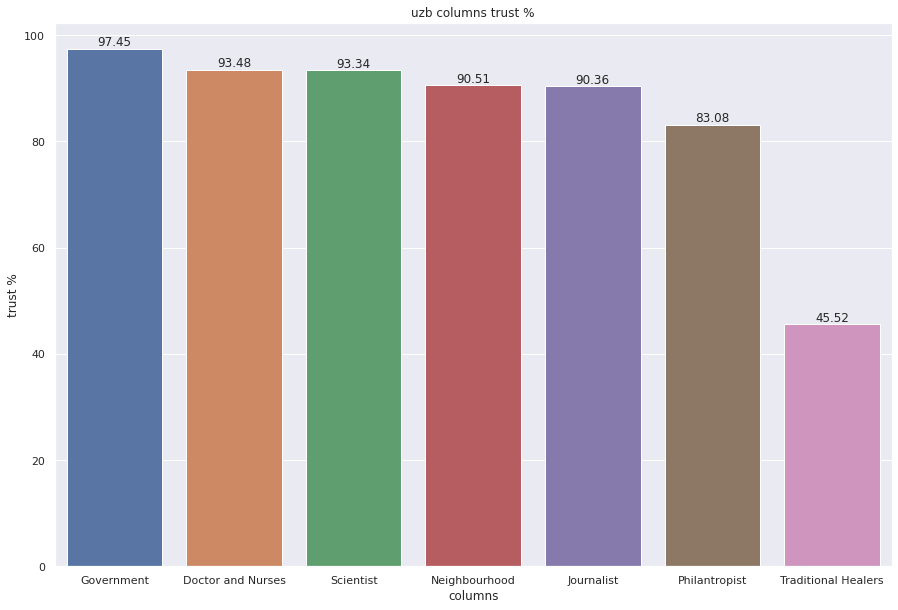

In [155]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_uzb.sort_values('%_percent', ascending=False),
            x = 'Columns',
            y = '%_percent')

plt.title('uzb columns trust %')
plt.xlabel('columns')
plt.ylabel('trust %')
ax.bar_label(ax.containers[0])
plt.show()

In [151]:
df_nor = df_nor.melt(
        id_vars = 'Country',
        value_vars=['Neighbourhood',
                'Government',
                'Scientist',
                'Journalist',
                'Doctor and Nurses',
                'Philantropist',
                'Traditional Healers'],
    var_name = 'Columns',
    value_name = '%_percent').sort_values(['Country','Columns'],ascending=True)

,Country,Columns,%_percent
4,Norway,Doctor and Nurses,99.40
1,Norway,Government,96.27
3,Norway,Journalist,87.92
0,Norway,Neighbourhood,96.13
5,Norway,Philantropist,91.86
2,Norway,Scientist,98.17
6,Norway,Traditional Healers,45.59


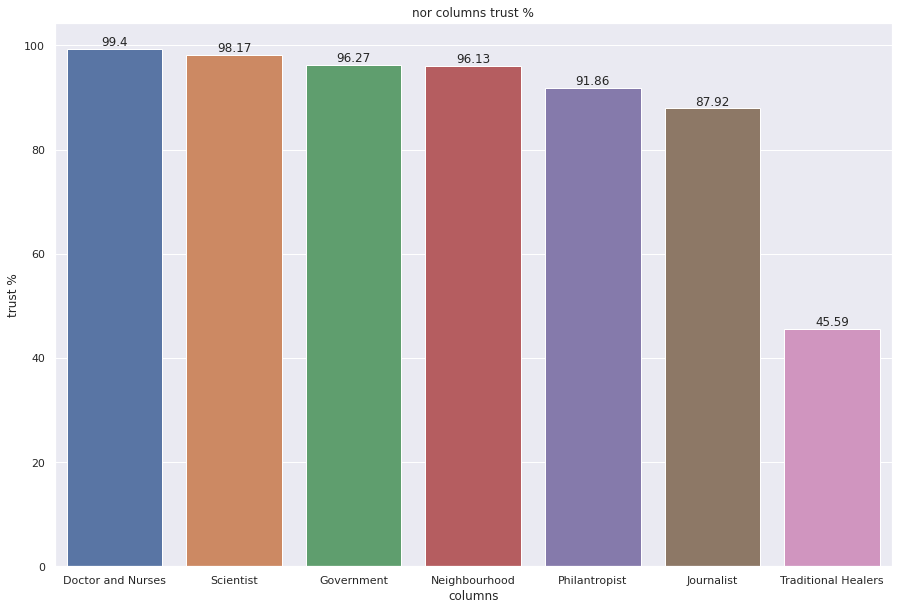

In [153]:
plt.figure(figsize=(15,10))
ax = sns.barplot(data=df_nor.sort_values('%_percent', ascending=False),
            x = 'Columns',
            y = '%_percent')

plt.title('nor columns trust %')
plt.xlabel('columns')
plt.ylabel('trust %')
ax.bar_label(ax.containers[0])
plt.show()

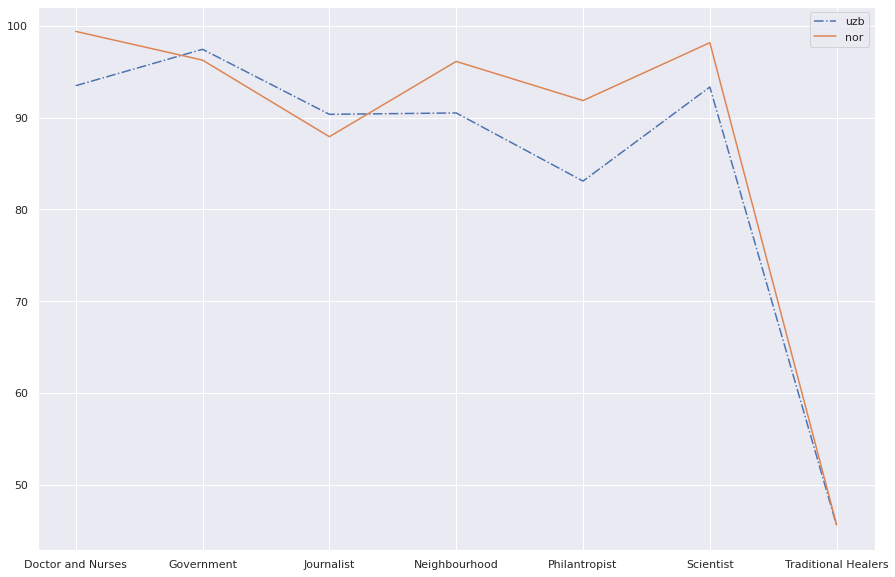

In [154]:
plt.figure(figsize=(15,10))
plt.plot(df_uzb['Columns'], df_uzb['%_percent'], ms=5, mec='k', markerfacecolor = 'o', ls='-.', label ='uzb')
plt.plot(df_nor['Columns'], df_nor['%_percent'], ms=5, label='nor')
plt.legend()
plt.show()

# 우즈벡은 전통의학을 제외한 모든 분야에 대한 신뢰도가 높다.